# 한국복지패널 데이터를 활용한 한국인의 삶 분석하기

## 필요한 패키지 설치

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pyreadstat
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 62.7 MB/s eta 0:00:00


## 라이브러리 import

In [ ]:
import pandas as pd # 데이터 분석
import numpy as np

import matplotlib.pyplot as plt # 차트
import seaborn as sns
import koreanize_matplotlib

import warnings
warnings.filterwarnings('ignore')

## 데이터 준비하기

In [ ]:
raw_welfare = pd.read_spss('/content/drive/MyDrive/colab/ABC_dataset/Koweps_hpwc14_2019_beta2.sav')
raw_welfare

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14413,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14414,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14415,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,208.0,NaN,0.0,NaN
14416,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,5.0,.,4.0,3.0,3.0,NaN,1200.0,NaN,0.0,NaN


In [ ]:
# 복사본 만들기
welfare = raw_welfare.copy()
welfare

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14413,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14414,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14415,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,208.0,NaN,0.0,NaN
14416,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,5.0,.,4.0,3.0,3.0,NaN,1200.0,NaN,0.0,NaN


## 데이터 확인하기

In [ ]:
welfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


In [ ]:
welfare.shape

(14418, 830)

## 데이터 전처리

### 칼럼명 변경하기

In [ ]:
# 변경할 칼럼의 이름을 dictionary 자료구조로 사용
col_names = {'h14_g3' : 'sex',
             'h14_g4' : 'birth',
             'h14_g10' : 'marriage_type',
             'h14_g11' : 'religion',
             'p1402_8aq1' :'income',
             'h14_eco9' : 'code_job',
             'h14_reg7' : 'region'
             }

# 칼럼명 변경
welfare = welfare.rename(columns=col_names)

In [ ]:
welfare[['sex', 'birth', 'marriage_type', 'religion', 'income', 'code_job', 'region']]

,sex,birth,marriage_type,religion,income,code_job,region
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0
1,1.0,1948.0,2.0,2.0,NaN,NaN,1.0
2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0
3,1.0,1962.0,1.0,1.0,192.0,855.0,1.0
4,2.0,1963.0,1.0,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...
14413,2.0,1967.0,1.0,1.0,NaN,NaN,5.0
14414,2.0,1992.0,5.0,1.0,NaN,NaN,5.0
14415,1.0,1995.0,5.0,1.0,NaN,910.0,5.0
14416,2.0,1998.0,5.0,1.0,200.0,246.0,5.0


## 1.성별에 따른 월급 차이 - 성별에 따라 월급이 다를까?

### 1) 성별데이터 확인하기

In [ ]:
print('성별 데이터 타입 확인: ', welfare['sex'].dtypes)
print('성별 데이터 결측치 확인: ', welfare['sex'].isna().sum())
print('성별 빈도 확인')
welfare['sex'].value_counts()

성별 데이터 타입 확인:  float64
성별 데이터 결측치 확인:  0
성별 빈도 확인


2.0    7913
1.0    6505
Name: sex, dtype: int64

### 2) 성별데이터 전처리

In [ ]:
# 성별데이타(1.0->male, 2.0->female)
welfare['sex'] = np.where(welfare['sex']==1, 'male', 'female')
print('성별 빈도 확인')
welfare['sex'].value_counts()

성별 빈도 확인


female    7913
male      6505
Name: sex, dtype: int64

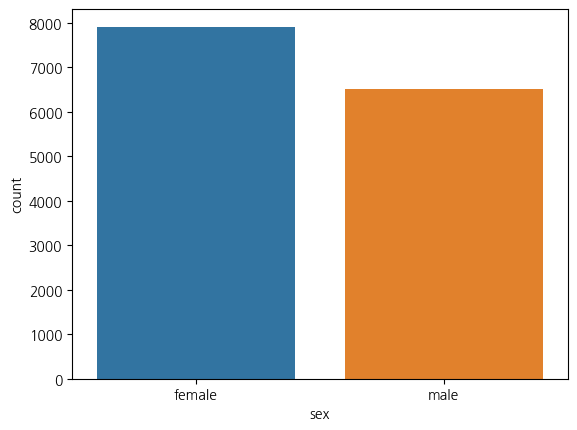

In [ ]:
# 그래프로 확인

sns.countplot(data=welfare, x = 'sex') # 차트만
plt.show()

### 3) 월급 데이터 확인하기

In [ ]:
print('월급 데이터 타입 확인: ', welfare['income'].dtypes)
print('월급 데이터 결측치 확인: ', welfare['income'].isna().sum())
print('월급 요약 통계량 확인')
welfare['income'].describe()

월급 데이터 타입 확인:  float64
월급 데이터 결측치 확인:  9884
월급 요약 통계량 확인


count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

<Axes: xlabel='income', ylabel='Count'>

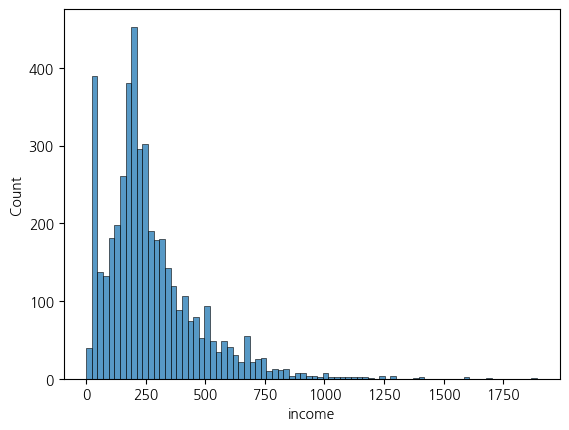

In [ ]:
# 그래프로 월급 분포도 확인
sns.histplot(data = welfare, x = 'income')

### 4) 월급 데이터 전처리 -> 결측치(NaN) 삭제

In [ ]:
welfare.dropna(subset=['income'], inplace=True)
print('월급 데이터 결측치 확인: ', welfare['income'].isna().sum())

월급 데이터 결측치 확인:  0


### 5) 성별 월급 평균표 만들기

In [ ]:
# 성별 기준으로 월급의 평균표 만들기
sex_income = welfare.groupby('sex', as_index=False).agg(mean_income = ('income', 'mean'))
sex_income

,sex,mean_income
0,female,186.293096
1,male,349.037571


### 6) 성별에 따른 월급 차이 분석

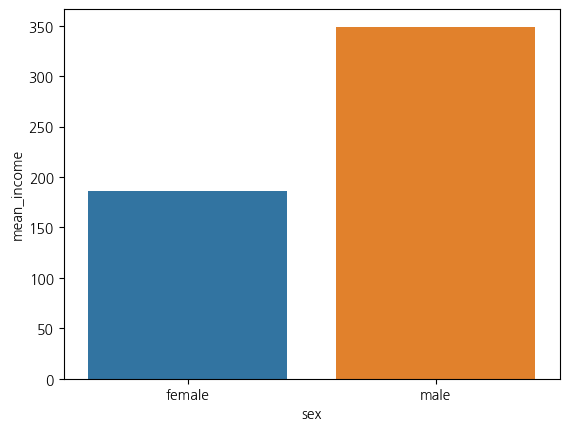

In [ ]:
sns.barplot(data=sex_income, x = 'sex', y = 'mean_income')
plt.show()

# 2. 나이와 월급의 관계 - 몇 살 때 월급을 가장 많이 받을까?

### 1) 나이 데이터 확인하기

In [ ]:
print('나이 데이터 타입 확인: ', welfare['birth'].dtypes)
print('나이 데이터 결측치 확인: ', welfare['birth'].isna().sum())
print('나이 요약 통계량 확인')
welfare['birth'].describe()

나이 데이터 타입 확인:  float64
나이 데이터 결측치 확인:  0
나이 요약 통계량 확인


count    4534.000000
mean     1971.144685
std        15.290056
min      1928.000000
25%      1961.000000
50%      1972.000000
75%      1982.000000
max      2001.000000
Name: birth, dtype: float64

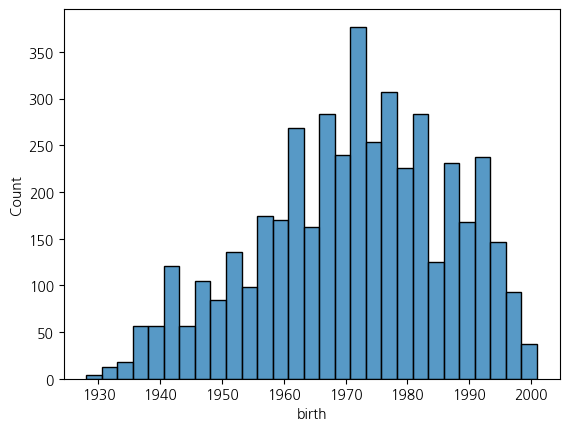

In [ ]:
# 그래프로 생년월일 분포도 확인
sns.histplot(data = welfare, x = 'birth')
plt.show()

### 2) 생년월일 전처리 -> 파생 변수 생성 -> 생년월일을 활용하여 나이 데이터 만들기

In [ ]:
welfare = welfare.assign(age = 2019-welfare['birth']+1)
welfare['age']

2        78.0
3        58.0
7        86.0
8        80.0
14       42.0
         ... 
14401    54.0
14402    58.0
14405    73.0
14410    64.0
14416    22.0
Name: age, Length: 4534, dtype: float64

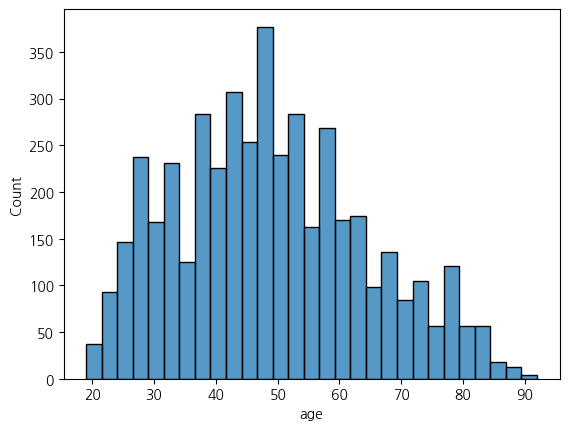

In [ ]:
# 그래프로 나이 분포도 확인
sns.histplot(data = welfare, x = 'age')
plt.show()

### 3) 나이에 따른 월급 평균표 만들기

In [ ]:
age_income = welfare.groupby('age').agg(mean_income = ('income', 'mean'))
age_income

,mean_income
age,
19.0,162.000000
20.0,121.333333
21.0,136.400000
22.0,123.666667
23.0,179.676471
...,...
88.0,27.000000
89.0,27.000000
90.0,27.000000


### 4) 나이와 월급의 관계 분석

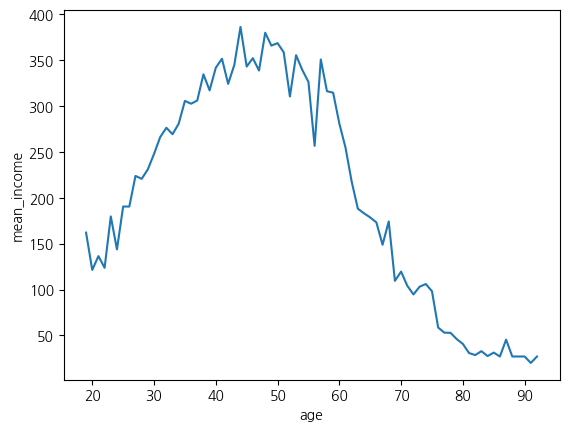

In [ ]:
sns.lineplot(data = age_income, x = 'age', y = 'mean_income')
plt.show()

In [ ]:
# 가장 월급을 많이 받는 나이는?
age_income['mean_income'].max()

386.1958762886598

In [ ]:
age_income.idxmax()

mean_income    44.0
dtype: float64

In [ ]:
age_income.loc[age_income.idxmax(),['mean_income']]

,mean_income
age,
44.0,386.195876


### 5) 나이 및 성별 월급 평균표

In [ ]:
sex_age_income = welfare.groupby(['age', 'sex'], as_index = False).agg(mean_income = ('income', 'mean'))
sex_age_income

,age,sex,mean_income
0,19.0,male,162.000000
1,20.0,female,87.666667
2,20.0,male,155.000000
3,21.0,female,124.000000
4,21.0,male,186.000000
...,...,...,...
140,89.0,male,27.000000
141,90.0,female,27.000000
142,91.0,female,27.000000
143,91.0,male,13.000000


### 6) 나이 및 성별 월급 차이 분석

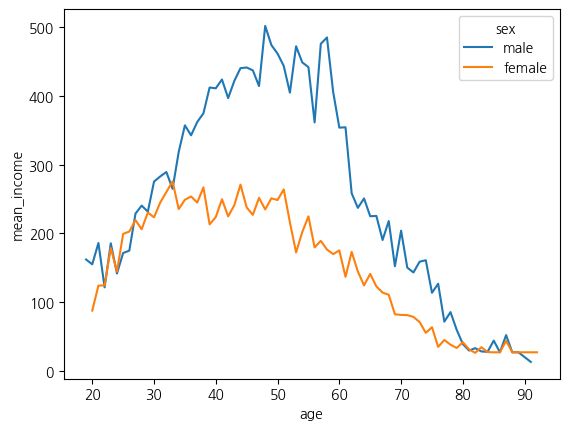

In [ ]:
sns.lineplot(data=sex_age_income, x = 'age', y = 'mean_income', hue = 'sex')
plt.show()